경사 하강법(Gradient Descent)  
기울기를 너무 크게 잡으면 오차가 커지고 기울기를 너무 작게 잡아도 오차가 커진다.  
기울기를 무한대로 키우면 오차도 무한대로 커지고 기울기를 무한대로 작게해도 오차는 무한대로 커진다.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 학습 데이터를 만든다.
data = [[2, 81], [4, 93], [6, 91], [8, 97]] # [공부한 시간(x), 실제 성적(y)]

xData = [i[0] for i in data] # 공부한 시간
yData = [i[1] for i in data] # 시험 성적 = 실제값

In [3]:
# 기울기 a와 y절편 b를 임의로 정한다.
# 기울기의 범위는 0 ~ 10 사이, y절편의 범위는 0 ~ 100 사이에서 임의로 변하게 한다.
# tf.random_uniform() : tensorflow에서 균등 분포의 난수를 발생시키는 함수
# tf.random_uniform([난수의 개수], 난수의 최솟값, 난수의 최댓값, dtype=난수의 데이터 타입. seed=숫자)
# 난수 발생시 seed를 지정하면 항상 일정한 배열의 난수가 발생된다.
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float32))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('a = {}, b = {}'.format(sess.run(a), sess.run(b)))

a = [8.651226], b = [99.922134]


In [4]:
# 예측 성적(y)를 얻기 위한 가설(수식)을 만든다.
y = a * xData + b

In [5]:
# tensorflow에서 실행할 RMSE(평균 제곱근 오차) 수식(오차(=비용) 함수)을 만든다.
# tf.square(y - yData) : 예측 성적(y)에서 실제 성적(yData)을 뺀 편차의 제곱을 계산한다. => 오차가 무조건 양수로 나오게 한다.
# tf.reduce_mean(tf.square(y - yData)) : 예측 성적과 실제 성적의 편차의 제곱에 대한 평균을 계산한다.
# tf.sqrt(tf.reduce_mean(tf.square(y - yData)) : 예측 성적과 실제 성적의 편차의 제곱에 대한 평균의 제곱근을 계산한다.

rmse = tf.sqrt(tf.reduce_mean(tf.square(y - yData)))

In [6]:
# 경사 하강법 알고리즘을 이용해서 RMSE를 최소로 하는 값을 찾는 수식을 만든다.
# 학습률을 정한다.
learning_rate = 0.1

# GradientDescentOptimizer(학습률) : 학습률에 따른 경사 하강 알고리즘을 계산한다.
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

학습을 시킨다.

In [7]:
import time

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(3001) :
    sess.run(gradient_descent)
    if (i % 200 == 0) :
        # Epoch : 1번 학습을 의미하는 용어
        # RMSE, 기울기 => 2.3에 가까워진다.
        # y절편 => 79에 가까워진다.
        
        print('Epoch : %4d, RMSE : %7.4f, 기울기 : %7.4f, y절편 : %7.4f' %(i, sess.run(rmse), sess.run(a), sess.run(b)))
        time.sleep(0.25) # 0.25초

Epoch :    0, RMSE : 33.0454, 기울기 :  8.0010, y절편 : 80.8461
Epoch :  200, RMSE :  2.8835, 기울기 :  2.2506, y절편 : 79.2948
Epoch :  400, RMSE :  2.8812, 기울기 :  2.2840, y절편 : 79.0954
Epoch :  600, RMSE :  2.8810, 기울기 :  2.2948, y절편 : 79.0309
Epoch :  800, RMSE :  2.8810, 기울기 :  2.2983, y절편 : 79.0100
Epoch : 1000, RMSE :  2.8810, 기울기 :  2.2995, y절편 : 79.0033
Epoch : 1200, RMSE :  2.8810, 기울기 :  2.2998, y절편 : 79.0011
Epoch : 1400, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 1600, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 1800, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 2000, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 2200, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 2400, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 2600, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 2800, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006
Epoch : 3000, RMSE :  2.8810, 기울기 :  2.2999, y절편 : 79.0006


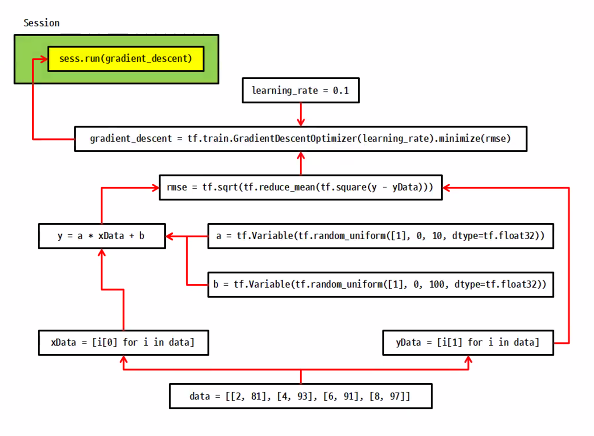

In [8]:
from IPython.display import Image
Image('./Image/경사하강법.PNG')